In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import dateutil

sns.set_style('whitegrid')
sns.set_color_codes('muted')

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
sizes = list(tips['size']).__iter__()

In [5]:
count = {}

for i in sizes:
    count[i] = count.get(i,0) + 1  

In [6]:
print count

{1: 4, 2: 156, 3: 38, 4: 37, 5: 5, 6: 4}


In [7]:
data = {'size': count.keys(), 'count': count.values()}

df = pd.DataFrame.from_dict(count, 'index')

In [8]:
df

,0
1,4
2,156
3,38
4,37
5,5
6,4


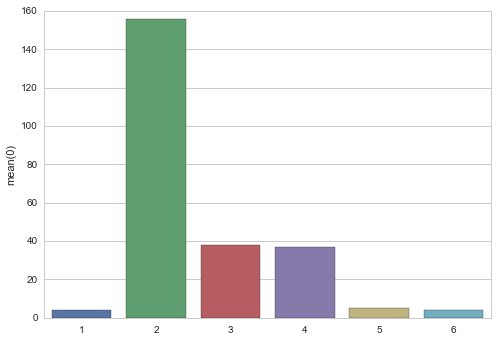

In [9]:
sns.barplot(x=df.index, y=df[0])

In [10]:
total = df[0].sum()
curSum = 0
median = None

for k,v in sorted(count.iteritems()):
    curSum += v
    if curSum>=total/2.0:
        median = k
        break

In [11]:
print "Total:", total
print "Median:", median

Total: 244
Median: 2


/Users/jgrundy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


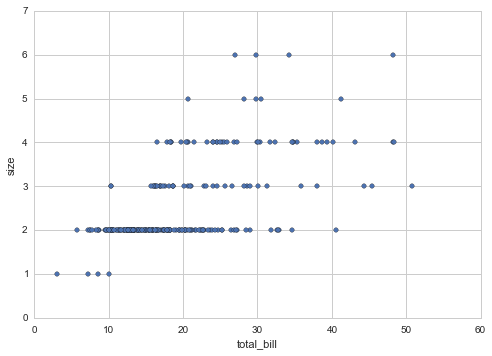

In [12]:
tips.plot(x="total_bill", y='size', kind='scatter')

In [13]:
bill_size = tips[['total_bill', 'size']]

bill_size.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


In [14]:
def data_stream(bill_dize, chunk_size=50):
    for i in xrange(0, len(bill_size), chunk_size):
        yield bill_size[i:i+chunk_size]

g = data_stream(bill_size, 50)

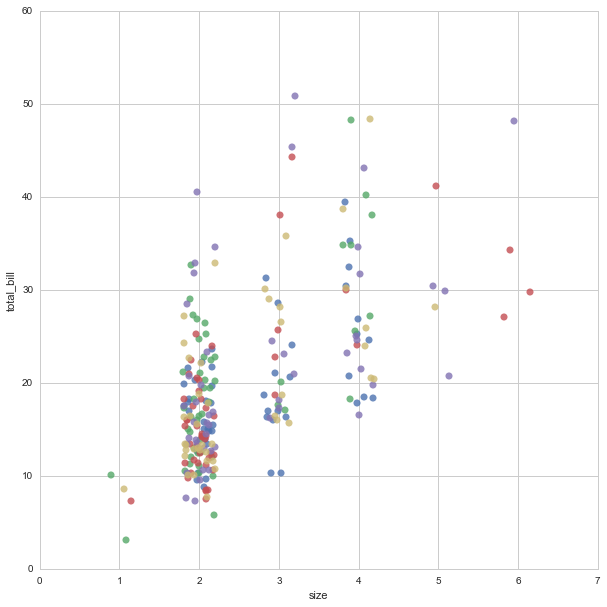

In [15]:
#g.next()
fig,ax = plt.subplots(figsize=(10,10))
for c in data_stream(bill_size,50):
    sns.regplot(y='total_bill', x='size', data=c, fit_reg=False, x_jitter=0.2, scatter_kws={'s':50})
    #c.plot(x="total_bill", y='size', kind='scatter')

In [16]:
with open('citibike.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    for row in reader:
        starttime = dateutil.parser.parse(row['starttime'])
        print starttime.hour, starttime.weekday()
        break

1 6


In [17]:
def citibike_hod(filename):
    with open(filename, 'r') as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            starttime = dateutil.parser.parse(row['starttime'])
            yield starttime.hour

In [18]:
g = citibike_hod('citibike.csv')

In [19]:
g

<generator object citibike_hod at 0x108494230>

In [20]:
count = {}

for hod in g:
    count[hod] = count.get(hod, 0) + 1

In [21]:
count

{0: 401,
 1: 248,
 2: 117,
 3: 89,
 4: 89,
 5: 293,
 6: 988,
 7: 2037,
 8: 3668,
 9: 3108,
 10: 2241,
 11: 2090,
 12: 2289,
 13: 2443,
 14: 2685,
 15: 2856,
 16: 3471,
 17: 4788,
 18: 4270,
 19: 2839,
 20: 1844,
 21: 1343,
 22: 1192,
 23: 811}

In [22]:
df = pd.DataFrame.from_dict(count, 'index')

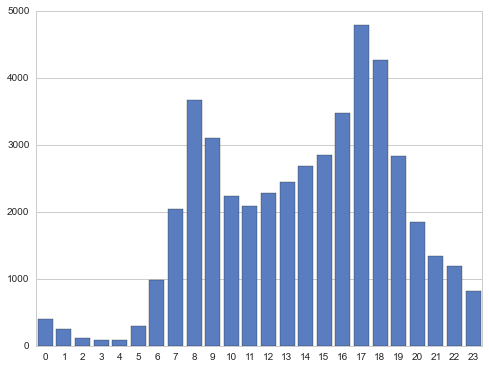

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x=count.keys(), y=count.values(),color='b')